In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('C:/Study/Study_Python2/Pandas 실습/부산기온데이터.csv', encoding='cp949', skiprows=7)

In [4]:
df.head

<bound method NDFrame.head of                날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
0      1904-04-09  159     11.3      7.8     16.1
1      1904-04-10  159      9.3      4.7     15.2
2      1904-04-11  159     10.6      NaN     14.9
3      1904-04-12  159     11.3      8.8     13.4
4      1904-04-13  159     14.5     11.1     16.9
...           ...  ...      ...      ...      ...
43149  2022-05-29  159     22.6     19.2     26.6
43150  2022-05-30  159     20.7     17.2     23.9
43151  2022-05-31  159     21.6     18.4     27.4
43152  2022-06-01  159     22.2     18.5     27.5
43153  2022-06-02  159     20.7     18.0     24.5

[43154 rows x 5 columns]>

- 가장 더웠던 날

In [5]:
df[df['최고기온(℃)']==df['최고기온(℃)'].max()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
41035,2016-08-14,159,31.7,28.3,37.3


- 일교차가 가장 큰 날

In [6]:
df['일교차'] = df['최고기온(℃)']- df['최저기온(℃)']
df[df['일교차']== df['일교차'].max()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일교차
28729,1982-12-05,159,3.9,-3.3,15.2,18.5


- 누락값 확인

In [7]:
df.count()

날짜         43154
지점         43154
평균기온(℃)    43154
최저기온(℃)    43144
최고기온(℃)    43150
일교차        43143
dtype: int64

In [8]:
df[pd.isnull(df['최저기온(℃)'])]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일교차
2,1904-04-11,159,10.6,NaN,14.9,NaN
8,1904-04-17,159,10.3,NaN,12.6,NaN
11,1904-04-20,159,11.9,NaN,NaN,NaN
12,1904-04-21,159,12.1,NaN,18.3,NaN
17,1904-04-26,159,14.5,NaN,17.6,NaN
28,1904-05-07,159,16.1,NaN,21.9,NaN
37,1904-05-16,159,16.3,NaN,21.1,NaN
40,1904-05-19,159,16.3,NaN,22.8,NaN
22961,1967-02-19,159,2.7,NaN,NaN,NaN
25392,1973-10-16,159,15.9,NaN,NaN,NaN


- 그래프표현

In [9]:
%matplotlib inline

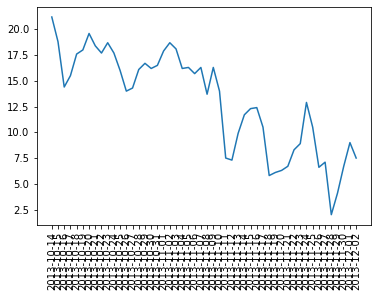

In [10]:
import matplotlib.pyplot as plt
plt.plot(df['날짜'][40000:40050], df['평균기온(℃)'][40000:40050])
plt.xticks(df['날짜'][40000:40050],rotation=90)
plt.show()

- 2000년 이후 3월 1일 이후 최고 / 최저 기온 확인

    - 연도 / 월 / 일 분리

In [11]:
df['연도'] = df['날짜'].apply(lambda x : x.split('-')[0])
df['월'] = df['날짜'].apply(lambda x : x.split('-')[1])
df['일'] = df['날짜'].apply(lambda x : x.split('-')[2])
print(df.head())

           날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)   일교차    연도   월   일
0  1904-04-09  159     11.3      7.8     16.1   8.3  1904  04  09
1  1904-04-10  159      9.3      4.7     15.2  10.5  1904  04  10
2  1904-04-11  159     10.6      NaN     14.9   NaN  1904  04  11
3  1904-04-12  159     11.3      8.8     13.4   4.6  1904  04  12
4  1904-04-13  159     14.5     11.1     16.9   5.8  1904  04  13


    - 2000년 이후 연도만 리스트로 저장

In [12]:
year = df[df['연도'] >= '2000']['연도'].unique()
ticks = range(len(year))
print(year)
print(ticks)

['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021' '2022']
range(0, 23)


    - 매년 3월 1일의 최고 기온 확인

In [14]:
최고기온 = df[
    (df['연도'] >= '2000') &
    (df['월'] == '03') &
    (df['일'] == '01')]['최고기온(℃)']

In [15]:
최고기온.index = ticks

In [16]:
print(최고기온)

0     12.1
1     11.9
2     15.1
3      8.6
4     10.0
5      9.4
6      6.4
7     14.5
8     13.4
9     13.6
10     9.9
11     9.7
12    12.5
13    14.2
14    11.4
15     9.6
16     7.7
17    13.8
18    12.0
19    16.1
20    15.6
21    15.5
22    15.0
Name: 최고기온(℃), dtype: float64


    - 매년 3월 1일의 최저 기온 확인

In [17]:
최저기온 = df[
    (df['연도'] >= '2000') &
    (df['월'] == '03') &
    (df['일'] == '01')]['최저기온(℃)']

In [18]:
최저기온.index = ticks

In [19]:
print(최저기온)

0     1.0
1     6.0
2     6.8
3     5.7
4     4.5
5    -0.1
6     0.4
7     4.7
8     2.1
9     5.9
10    5.5
11    2.5
12    6.2
13    1.1
14    8.0
15    2.2
16   -4.3
17    6.2
18    2.7
19    7.0
20    7.2
21    5.2
22    8.3
Name: 최저기온(℃), dtype: float64


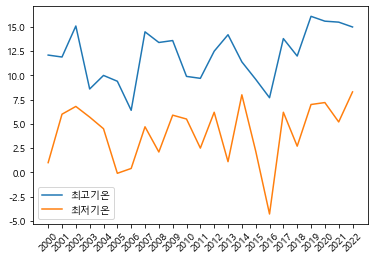

In [20]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.plot(최고기온, label='최고기온')
plt.plot(최저기온, label='최저기온')
plt.xticks(ticks, year, rotation=45)
plt.legend()
plt.show()

- 연도별 평균기온

연도
1904    16.880524
1905    13.973151
1906    13.076438
1907    13.579178
1908    13.347814
          ...    
2018    15.115068
2019    15.751507
2020    15.205464
2021    15.771233
2022    10.632680
Name: 평균기온(℃), Length: 119, dtype: float64


<AxesSubplot:xlabel='연도'>

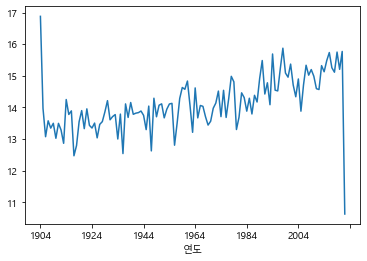

In [22]:
df_group = df.groupby('연도')['평균기온(℃)'].mean()
print(df_group)
df_group.plot()

- 연도별 최고기온 데이터를 히스토그램으로 표현

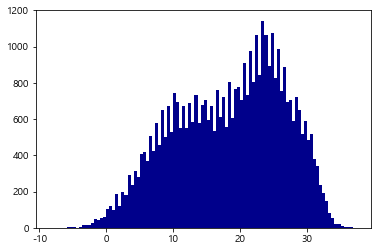

In [27]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.hist(df['최고기온(℃)'], bins=100, color='darkblue')
plt.show()